In [2]:
# pip install pandas

# pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


requests 2.25.1 has requirement idna<3,>=2.5, but you'll have idna 3.2 which is incompatible.
You are using pip version 10.0.1, however version 21.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [149]:
# pip install -U scikit-learn

In [5]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings; warnings.simplefilter('ignore')

In [72]:
# 读取数据
df = pd.read_csv("https://raw.githubusercontent.com/ttkkyycr/ttkkyycr/main/data2.csv")
X = df.drop(['Name','ORR'], axis=1)
Y = df['ORR']

In [7]:
df.iloc[[0,1]]

,ORR,original.shape.VoxelVolume,original.shape.Maximum3DDiameter,original.shape.MeshVolume,original.shape.MajorAxisLength,original.shape.Sphericity,original.shape.LeastAxisLength,original.shape.Elongation,original.shape.SurfaceVolumeRatio,original.shape.Maximum2DDiameterSlice,...,original.glszm.HighGrayLevelZoneEmphasis,original.glszm.SmallAreaEmphasis,original.glszm.LowGrayLevelZoneEmphasis,original.glszm.ZoneEntropy,original.glszm.SmallAreaLowGrayLevelEmphasis,original.ngtdm.Coarseness,original.ngtdm.Complexity,original.ngtdm.Strength,original.ngtdm.Contrast,original.ngtdm.Busyness
0,1,72932.16866,89.441729,72614.8736,70.159054,0.634966,39.262714,0.698354,0.182554,81.219200,...,36.574586,0.588562,0.053748,4.970060,0.031939,0.000485,32.022850,0.027264,0.010364,22.211334
1,1,340027.46100,118.286786,339790.5327,100.180269,0.664348,66.254038,0.732715,0.104316,113.768425,...,81.068342,0.640000,0.015946,4.503021,0.010451,0.000045,72.361118,0.006376,0.005735,105.228890


In [91]:
# 数据标准化与归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_SS = scaler.fit_transform(X)
X_SS = pd.DataFrame(X_SS)
X_SS.columns = X.columns
X_SS

,original.shape.VoxelVolume,original.shape.Maximum3DDiameter,original.shape.MeshVolume,original.shape.MajorAxisLength,original.shape.Sphericity,original.shape.LeastAxisLength,original.shape.Elongation,original.shape.SurfaceVolumeRatio,original.shape.Maximum2DDiameterSlice,original.shape.Flatness,...,original.glszm.HighGrayLevelZoneEmphasis,original.glszm.SmallAreaEmphasis,original.glszm.LowGrayLevelZoneEmphasis,original.glszm.ZoneEntropy,original.glszm.SmallAreaLowGrayLevelEmphasis,original.ngtdm.Coarseness,original.ngtdm.Complexity,original.ngtdm.Strength,original.ngtdm.Contrast,original.ngtdm.Busyness
0,-0.779589,-1.011198,-0.779919,-1.125320,0.302521,-0.822207,-0.255495,0.946346,-1.074269,-0.028508,...,-0.570612,-0.726510,1.873703,-0.458192,1.879805,1.849592,-0.420262,-0.406078,0.714900,-0.483375
1,0.213310,0.021770,0.213592,0.151098,0.828694,0.631509,0.001103,-0.890240,0.344398,0.837361,...,-0.504578,0.476353,-0.373917,-0.924976,-0.293106,-0.743499,-0.415501,-0.408256,-0.292609,1.623133
2,-0.598430,-0.326753,-0.598267,-0.430109,-0.472820,-0.640781,-0.846400,0.535196,-0.439512,-0.597414,...,3.757027,0.798718,-1.281548,2.133470,-1.297865,0.288097,4.173317,2.547727,2.319948,-1.036953
3,-0.247936,1.242932,-0.248835,1.190555,-1.270269,-0.190836,-1.173317,0.122053,1.852235,-1.309760,...,0.799923,1.062569,-1.099702,1.783288,-1.115463,-0.153542,1.169652,0.875913,1.030575,-0.990974
4,-0.560998,-0.187947,-0.562229,-0.146734,-1.037350,-0.671850,1.005778,0.649844,-0.271736,-0.950158,...,-0.568044,-1.463629,1.874140,-0.176789,1.633581,1.637218,-0.421165,-0.406834,1.053685,-0.352085
5,0.312424,1.562767,0.312494,1.211024,-0.682053,0.333673,-0.440420,-0.603643,1.267116,-0.660584,...,-0.544863,-1.668958,0.255052,-0.358838,0.135653,-0.725805,-0.419256,-0.408175,-0.707172,2.120551
6,-0.620188,-0.581217,-0.620076,-0.875078,-0.258169,-0.632383,0.233914,0.521430,-0.341645,-0.002680,...,-0.561213,-0.374053,1.005518,-0.773023,1.031807,-0.011252,-0.420780,-0.407683,0.036210,0.401435
7,1.288625,0.911598,1.288890,1.446552,0.857563,1.283224,-0.302353,-1.349441,-0.123955,0.312885,...,1.180189,1.721444,-1.235980,1.708469,-1.253613,-0.794220,1.374424,0.007395,-0.256220,-0.914185
8,-0.878021,-1.229524,-0.877685,-1.007948,-0.030269,-1.310555,-2.079743,1.789140,-1.182634,-1.267264,...,-0.546853,0.373277,0.886254,-0.441646,1.033127,1.024708,-0.409300,-0.399252,-0.053878,-0.658761
9,-0.948205,-1.975909,-0.947944,-1.673194,0.865427,-1.655863,-1.496909,2.309546,-1.918920,-1.257194,...,-0.537180,0.225393,0.545568,-0.703811,0.464263,3.351543,-0.417880,-0.399581,0.048397,-0.820823


In [74]:
# 将数据分为测试集与训练集（可选）
from sklearn.model_selection import train_test_split
X = X_SS
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


In [90]:
# from sklearn.linear_model import Lasso

# reg = Lasso(alpha=0.5)
# reg.fit(X_train, y_train)

# Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
#    normalize=False, positive=False, precompute=False, random_state=None,
#    selection='cyclic', tol=0.0001, warm_start=False)

# print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
# print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

In [14]:
# lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
# l_num = 7
# pred_num = X.shape[1]

# # prepare data for enumerate
# coeff_a = np.zeros((l_num, pred_num))
# train_r_squared = np.zeros(l_num)
# test_r_squared = np.zeros(l_num)

# # enumerate through lambdas with index and i
# for ind, i in enumerate(lambdas):    
#     reg = Lasso(alpha = i)
#     reg.fit(X_train, y_train)

#     coeff_a[ind,:] = reg.coef_
#     train_r_squared[ind] = reg.score(X_train, y_train)
#     test_r_squared[ind] = reg.score(X_test, y_test)

In [89]:
# # Plotting
# plt.figure(figsize=(18, 8))
# plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
# plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
# plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
# plt.xlim(0, 6)
# plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
# plt.legend(loc='best')
# plt.grid()

In [88]:
# # 通过不确定的alphas值，生成不同的LASSO回归模型
# alphas = 10**np.linspace(-3,3,100)
# lasso_cofficients = []

# for alpha in alphas:
#     lasso = Lasso(alpha = alpha, normalize=True, max_iter=10000)
#     lasso.fit(X_SS, y)
#     lasso_cofficients.append(lasso.coef_)

# # 绘制alpha的对数与回归系数的关系# 中文乱码和坐标轴负号的处理
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# plt.rcParams['axes.unicode_minus'] = False
# # 设置绘图风格
# plt.style.use('ggplot')
# plt.plot(alphas, lasso_cofficients)
# plt.xscale('log')
# plt.axis('tight')
# plt.title('alpha系数与LASSO回归系数的关系')
# plt.xlabel('Log Alpha')
# plt.ylabel('Cofficients')
# plt.show()

In [151]:
# LASSO回归模型的交叉验证
from sklearn.linear_model import Lasso,LassoCV
from sklearn.metrics import mean_squared_error

alphas = np.logspace(-3,0,50)
lasso_cv = LassoCV(alphas=alphas, normalize=True, cv = 10, max_iter=100000)
lasso_cv.fit(X_SS, y)
# 取出最佳的lambda值
lasso_best_alpha = lasso_cv.alpha_
lasso_best_alpha

0.022229964825261943

In [152]:
# LassoCV建模结果
lasso_cv.coef_

array([-0.        , -0.        , -0.        , -0.        ,  0.05701984,
       -0.        ,  0.        , -0.        , -0.01141438,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.08442077,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.07512755,
        0.        , -0.        , -0.        , -0.        , -0.07463616,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

In [94]:
# # 基于最佳的lambda值运用Lasso建模
# lasso = Lasso(alpha = lasso_best_alpha, normalize=True, max_iter=10000)
# lasso.fit(X_train, y_train)

# print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
# print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

In [141]:
X.columns[lasso_cv.coef_!=0]

Index(['original.shape.Sphericity', 'original.shape.Maximum2DDiameterSlice',
       'original.gldm.SmallDependenceLowGrayLevelEmphasis',
       'original.glcm.Idn', 'original.glcm.MCC',
       'original.glrlm.LongRunHighGrayLevelEmphasis',
       'original.glszm.SmallAreaLowGrayLevelEmphasis'],
      dtype='object')

In [142]:
coef = pd.Series(lasso_cv.coef_, index = X.columns)
print(coef)

original.shape.VoxelVolume         -0.000000
original.shape.Maximum3DDiameter   -0.000000
original.shape.MeshVolume          -0.000000
original.shape.MajorAxisLength     -0.000000
original.shape.Sphericity           0.042533
                                      ...   
original.ngtdm.Coarseness           0.000000
original.ngtdm.Complexity          -0.000000
original.ngtdm.Strength            -0.000000
original.ngtdm.Contrast             0.000000
original.ngtdm.Busyness             0.000000
Length: 107, dtype: float64


In [143]:
index = coef[coef !=0].index

print(coef[coef !=0])

original.shape.Sphericity                            0.042533
original.shape.Maximum2DDiameterSlice               -0.006612
original.gldm.SmallDependenceLowGrayLevelEmphasis    0.084925
original.glcm.Idn                                   -0.061873
original.glcm.MCC                                   -0.083172
original.glrlm.LongRunHighGrayLevelEmphasis         -0.025505
original.glszm.SmallAreaLowGrayLevelEmphasis         0.011625
dtype: float64


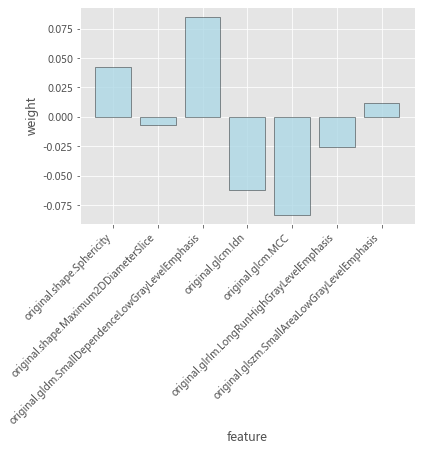

In [144]:
# 绘制特征权重图
import matplotlib.pyplot as plt
%matplotlib inline

x_values = np.arange(len(index))
y_values = coef[coef !=0]
plt.bar(x_values, y_values
        , color = 'lightblue'
        , edgecolor = 'black'
        , alpha = 0.8
       )
plt.xticks(x_values,index
           , rotation='45'
           , ha = 'right'
            ,va = 'top'
          )
plt.xlabel('feature')
plt.ylabel('weight')
plt.show()

NameError: name 'MultipleLocator' is not defined

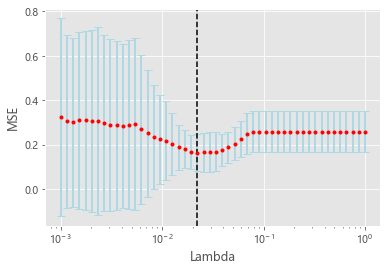

In [153]:
# Lambda图_
MSEs = lasso_cv.mse_path_

MSEs_mean = np.apply_along_axis(np.mean,1,MSEs)
MSEs_std = np.apply_along_axis(np.std,1,MSEs)

plt.figure() #dpi=300
plt.errorbar(lasso_cv.alphas_, MSEs_mean
            , yerr=MSEs_std
            , fmt="o"
            , ms=3
            , mfc="r"
            , mec="r"
            , ecolor="lightblue"
            , elinewidth=2
            , capsize=4
            , capthick=1)
plt.semilogx()
plt.axvline(lasso_cv.alpha_, color='black',ls='--')
plt.xlabel('Lambda')
plt.ylabel('MSE')
ax = plt.gca()
y_major_locator = MultipleLocator(0.05)
ax.yaxis.set_major_locator(y_major_locator)
plt.show

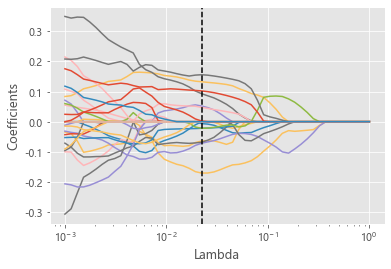

In [154]:
# 特征值随Lambda取值变化图
coefs = lasso_cv.path(X_SS, y, alphas=alphas, max_iter=100000)[1].T
plt.figure()
plt.semilogx(lasso_cv.alphas_, coefs, '-')
plt.axvline(lasso_cv.alpha_, color='black', ls='--')
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.show()

In [137]:
# 导入数据
Clin_Radio_demographic = pd.read_csv('https://raw.githubusercontent.com/ttkkyycr/ttkkyycr/main/data2_MultiVA_rearranged.csv')
CR_dg = Clin_Radio_demographic.drop(['Specification','Name','TYPE','BCLC_stage','Gender'], axis=1)
CR_dg.head()

,ORR,HAIC_sesion,Bilobal,Over7cm,Infiltration,Arterial_enhanced,Delay_enhanced,Uniformly_enhanced,Age,Previous_treatment,...,LY,NEUT,PLT,PT,INR,FIB,CP_score,PVTT,VP_grade,metastatesis
0,1,3,0,1,1,0,0,0,58,0,...,1.17,4.36,161,14.4,1.11,2.86,6,1,3,0
1,1,2,0,1,0,1,1,0,53,1,...,0.93,4.55,234,14.9,1.27,3.56,6,1,2,1
2,1,3,1,1,0,0,1,0,57,0,...,1.43,3.41,78,12.8,1.11,2.59,5,1,3,0
3,1,2,0,0,1,0,1,0,67,2,...,2.72,3.09,146,12.5,1.08,2.28,6,0,0,1
4,1,3,0,1,0,1,0,1,58,0,...,4.84,1.89,164,14.8,1.26,2.38,8,1,2,0


In [ ]:
X_multiVA = CR_dg.drop(['Name','ORR','TYPE', ])